# SET A node 1

In [1]:
import pandas as pd 
import numpy as np
import test_cleaner
import ppscore as pps
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error 
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR 
import re
%matplotlib inline
import test_cleaner

In [2]:
data_setA_node1 = pd.read_csv('data_setA_node1.csv')
data_setA_node1['date'] = pd.to_datetime(data_setA_node1['date'])
data_setA_node1 = data_setA_node1.set_index('date')

In [3]:
data_setA_node1.head()

,Facebook.wiki,Google.wiki,Microsoft.wiki,Amazon (company).wiki,Apple Inc..wiki,AAPL,AMZN,FB,GOOGL,MSFT,...,postelection,angrily,immensely,banner,authenticator,foremost,redress,properly,wait,disclosure
date,,,,,,,,,,,,,,,,,,,,,
2015-07-08,45403,45521,10472,1,14554,112.758286,429.700012,85.650002,541.700012,39.941715,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-09,47202,43295,9806,1,13725,110.458405,434.390015,85.879997,544.650024,40.194511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-10,46622,42652,7816,0,12394,113.411430,443.510010,87.949997,556.109985,40.275764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-13,47063,44437,7857,2,12479,115.600922,455.570007,90.099998,571.729980,41.115414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-14,44508,45269,7314,0,11447,115.554909,465.570007,89.680000,584.179993,41.187630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
non_text_features = [x for x  in list(data_setA_node1.columns[0:65]) if 't-' in x]
print(len(non_text_features))

45


In [6]:
text_features = [x for x  in list(data_setA_node1.columns[65:])]
print(text_features[0])
print(text_features[1])
print(text_features[-1])
print(len(text_features))

age
easing
disclosure
9959


## Text two day roll back 

* +1 == shift downward == look for values one day before 
* -1 == shift upward   == look for values one day in the future

In [7]:
data_setA_node1[text_features] = data_setA_node1[text_features].shift(1)
mapping = dict(zip(text_features,[x + '_t-1' for x in text_features]))
data_setA_node1 = data_setA_node1.rename(columns = mapping)
text_features = [x + '_t-1' for x in text_features]
data_setA_node1[text_features].head()

,age_t-1,easing_t-1,tout_t-1,appealing_t-1,wager_t-1,organic_t-1,harry_t-1,saint_t-1,reliable_t-1,spectrum_t-1,...,postelection_t-1,angrily_t-1,immensely_t-1,banner_t-1,authenticator_t-1,foremost_t-1,redress_t-1,properly_t-1,wait_t-1,disclosure_t-1
date,,,,,,,,,,,,,,,,,,,,,
2015-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
temp = data_setA_node1[text_features].shift(1)
temp.columns = [x[0:-1] + str(int(x[-1]) +1)  for x in text_features]

In [9]:
temp.head()

,age_t-2,easing_t-2,tout_t-2,appealing_t-2,wager_t-2,organic_t-2,harry_t-2,saint_t-2,reliable_t-2,spectrum_t-2,...,postelection_t-2,angrily_t-2,immensely_t-2,banner_t-2,authenticator_t-2,foremost_t-2,redress_t-2,properly_t-2,wait_t-2,disclosure_t-2
date,,,,,,,,,,,,,,,,,,,,,
2015-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
data = data_setA_node1.merge(temp, left_index = True, right_index =True, how = 'inner')
data = data.dropna()
data.head()

,Facebook.wiki,Google.wiki,Microsoft.wiki,Amazon (company).wiki,Apple Inc..wiki,AAPL,AMZN,FB,GOOGL,MSFT,...,postelection_t-2,angrily_t-2,immensely_t-2,banner_t-2,authenticator_t-2,foremost_t-2,redress_t-2,properly_t-2,wait_t-2,disclosure_t-2
date,,,,,,,,,,,,,,,,,,,,,
2015-07-10,46622,42652,7816,0,12394,113.411430,443.510010,87.949997,556.109985,40.275764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-13,47063,44437,7857,2,12479,115.600922,455.570007,90.099998,571.729980,41.115414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-14,44508,45269,7314,0,11447,115.554909,465.570007,89.680000,584.179993,41.187630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-15,44555,44688,7583,3,10436,116.668060,461.190002,89.760002,583.960022,41.314034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-16,45184,44310,7442,0,10174,118.222786,475.480011,90.849998,601.780029,42.126591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Standardisation 

## Log transformation 
### We have to take out amazon as there are potential dat aissus

In [11]:
amazon = [x for x in (data.columns) if 'Amazon (company).wiki' in x]
print(amazon)
data = data.drop(columns = amazon)
data.head()

['Amazon (company).wiki', 'Amazon (company).wiki_t-1', 'Amazon (company).wiki_t-2', 'Amazon (company).wiki_t-3', 'Amazon (company).wiki_t-1_t-2', 'Amazon (company).wiki_t-2_t-3', 'Amazon (company).wiki_t-3_t-4']


,Facebook.wiki,Google.wiki,Microsoft.wiki,Apple Inc..wiki,AAPL,AMZN,FB,GOOGL,MSFT,FB_return,...,postelection_t-2,angrily_t-2,immensely_t-2,banner_t-2,authenticator_t-2,foremost_t-2,redress_t-2,properly_t-2,wait_t-2,disclosure_t-2
date,,,,,,,,,,,,,,,,,,,,,
2015-07-10,46622,42652,7816,12394,113.411430,443.510010,87.949997,556.109985,40.275764,0.024103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-13,47063,44437,7857,12479,115.600922,455.570007,90.099998,571.729980,41.115414,0.024446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-14,44508,45269,7314,11447,115.554909,465.570007,89.680000,584.179993,41.187630,-0.004661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-15,44555,44688,7583,10436,116.668060,461.190002,89.760002,583.960022,41.314034,0.000892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-16,45184,44310,7442,10174,118.222786,475.480011,90.849998,601.780029,42.126591,0.012143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
non_text_features = [x for x in non_text_features if  x not in amazon]
print(len(non_text_features))

39


In [13]:
non_text_features[:12]

['Facebook.wiki_t-1',
 'Facebook.wiki_t-2',
 'Facebook.wiki_t-3',
 'Google.wiki_t-1',
 'Google.wiki_t-2',
 'Google.wiki_t-3',
 'Microsoft.wiki_t-1',
 'Microsoft.wiki_t-2',
 'Microsoft.wiki_t-3',
 'Apple Inc..wiki_t-1',
 'Apple Inc..wiki_t-2',
 'Apple Inc..wiki_t-3']

In [14]:
non_text_features

['Facebook.wiki_t-1',
 'Facebook.wiki_t-2',
 'Facebook.wiki_t-3',
 'Google.wiki_t-1',
 'Google.wiki_t-2',
 'Google.wiki_t-3',
 'Microsoft.wiki_t-1',
 'Microsoft.wiki_t-2',
 'Microsoft.wiki_t-3',
 'Apple Inc..wiki_t-1',
 'Apple Inc..wiki_t-2',
 'Apple Inc..wiki_t-3',
 'FB_return_t-1',
 'FB_return_t-2',
 'FB_return_t-3',
 'GOOGL_return_t-1',
 'GOOGL_return_t-2',
 'GOOGL_return_t-3',
 'MSFT_return_t-1',
 'MSFT_return_t-2',
 'MSFT_return_t-3',
 'AMZN_return_t-1',
 'AMZN_return_t-2',
 'AMZN_return_t-3',
 'AAPL_return_t-1',
 'AAPL_return_t-2',
 'AAPL_return_t-3',
 'Facebook.wiki_t-1_t-2',
 'Facebook.wiki_t-2_t-3',
 'Facebook.wiki_t-3_t-4',
 'Google.wiki_t-1_t-2',
 'Google.wiki_t-2_t-3',
 'Google.wiki_t-3_t-4',
 'Microsoft.wiki_t-1_t-2',
 'Microsoft.wiki_t-2_t-3',
 'Microsoft.wiki_t-3_t-4',
 'Apple Inc..wiki_t-1_t-2',
 'Apple Inc..wiki_t-2_t-3',
 'Apple Inc..wiki_t-3_t-4']

## log trans for wiki t- n 

Facebook.wiki_t-1
Facebook.wiki_t-2
Facebook.wiki_t-3
Google.wiki_t-1
Google.wiki_t-2
Google.wiki_t-3
Microsoft.wiki_t-1
Microsoft.wiki_t-2
Microsoft.wiki_t-3
Apple Inc..wiki_t-1
Apple Inc..wiki_t-2
Apple Inc..wiki_t-3


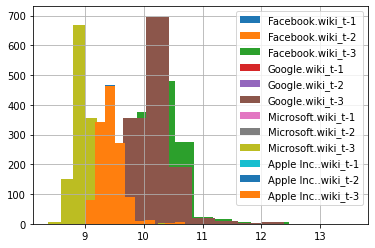

In [15]:
for features in non_text_features[:12]: 
    if 'wiki' in features: 
        if 't-1_t-2' not in features: 
            if 't-2_t-3' not in features: 
                 if 't-3_t-4' not in features: 
                    print(features) 
                    data[features] = np.log(data[features])
                    data[features].hist(legend = True)

In [16]:
non_text_features[12:]

['FB_return_t-1',
 'FB_return_t-2',
 'FB_return_t-3',
 'GOOGL_return_t-1',
 'GOOGL_return_t-2',
 'GOOGL_return_t-3',
 'MSFT_return_t-1',
 'MSFT_return_t-2',
 'MSFT_return_t-3',
 'AMZN_return_t-1',
 'AMZN_return_t-2',
 'AMZN_return_t-3',
 'AAPL_return_t-1',
 'AAPL_return_t-2',
 'AAPL_return_t-3',
 'Facebook.wiki_t-1_t-2',
 'Facebook.wiki_t-2_t-3',
 'Facebook.wiki_t-3_t-4',
 'Google.wiki_t-1_t-2',
 'Google.wiki_t-2_t-3',
 'Google.wiki_t-3_t-4',
 'Microsoft.wiki_t-1_t-2',
 'Microsoft.wiki_t-2_t-3',
 'Microsoft.wiki_t-3_t-4',
 'Apple Inc..wiki_t-1_t-2',
 'Apple Inc..wiki_t-2_t-3',
 'Apple Inc..wiki_t-3_t-4']

In [17]:
data['Facebook.wiki_t-1_t-2'] = data['Facebook.wiki_t-1'] - data['Facebook.wiki_t-2']
data['Facebook.wiki_t-2_t-3'] = data['Facebook.wiki_t-2'] - data['Facebook.wiki_t-3']

In [18]:
data['Google.wiki_t-1_t-2'] = data['Google.wiki_t-1'] - data['Google.wiki_t-2']
data['Google.wiki_t-2_t-3'] = data['Google.wiki_t-2'] - data['Google.wiki_t-3']

In [19]:
data['Microsoft.wiki_t-1_t-2'] = data['Microsoft.wiki_t-1'] - data['Microsoft.wiki_t-2']
data['Microsoft.wiki_t-2_t-3'] = data['Microsoft.wiki_t-2'] - data['Microsoft.wiki_t-3'] 

In [20]:
data['Apple Inc..wiki_t-1_t-2'] = data['Apple Inc..wiki_t-1'] - data['Apple Inc..wiki_t-2']
data['Apple Inc..wiki_t-2_t-3'] = data['Apple Inc..wiki_t-2'] - data['Apple Inc..wiki_t-3']

In [21]:
data = data.drop(columns = ['Facebook.wiki_t-3_t-4',
                            'Microsoft.wiki_t-3_t-4',
                            'Apple Inc..wiki_t-3_t-4',
                            'Google.wiki_t-3_t-4'])

In [22]:
data.head()

,Facebook.wiki,Google.wiki,Microsoft.wiki,Apple Inc..wiki,AAPL,AMZN,FB,GOOGL,MSFT,FB_return,...,postelection_t-2,angrily_t-2,immensely_t-2,banner_t-2,authenticator_t-2,foremost_t-2,redress_t-2,properly_t-2,wait_t-2,disclosure_t-2
date,,,,,,,,,,,,,,,,,,,,,
2015-07-10,46622,42652,7816,12394,113.411430,443.510010,87.949997,556.109985,40.275764,0.024103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-13,47063,44437,7857,12479,115.600922,455.570007,90.099998,571.729980,41.115414,0.024446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-14,44508,45269,7314,11447,115.554909,465.570007,89.680000,584.179993,41.187630,-0.004661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-15,44555,44688,7583,10436,116.668060,461.190002,89.760002,583.960022,41.314034,0.000892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-16,45184,44310,7442,10174,118.222786,475.480011,90.849998,601.780029,42.126591,0.012143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
non_text_features = [x for x  in list(data.columns[0:54]) if 't-' in x]
print(len(non_text_features))

35


In [23]:
print(len([ x for  x in non_text_features if  'wiki' in x]))
print(len([ x for  x in non_text_features if  'wiki'  not in x]))

20
15


In [24]:
print(len(text_features))

9959


In [25]:
print(len(text_features + list(temp.columns)))

19918


In [32]:
text_f = text_features + list(temp.columns)
print(len(text_f))

19918


## Forecasting 

In [23]:
def MDA(data, predicted_name): 
    correct = 0
    df = data[['FB',predicted_name]].reset_index()
    for i, r in df.iterrows(): 
        if  i  > 0: 
            if r[predicted_name] > df.at[i-1, 'FB']: 
                if r['FB'] > df.at[i-1, 'FB']: 
                    df.at[i,'correct'] = 1
                    correct += 1 
            if r[predicted_name] < df.at[i-1, 'FB']: 
                if r['FB'] < df.at[i-1, 'FB']: 
                    df.at[i,'correct'] = 1
                    correct += 1 
    return (correct/df.shape[0])

In [24]:
train_test_split = 0.80
total_days = len(data.index)
split_week = data.index[round(total_days*(train_test_split))]
train = data[data.index <= split_week]
test = data[data.index > split_week]
print(split_week)
print(train.shape)
print(test.shape)

2019-08-05 00:00:00
(1025, 19972)
(255, 19972)


In [25]:
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler()
y_sc = StandardScaler()

In [30]:
train_X, train_y = train[non_text_features + text_f], train['FB_return']

In [31]:
test_X, test_y = test[non_text_features + text_f], test['FB_return']

In [32]:
train_X_sc, train_y_sc = x_sc.fit_transform(train_X), y_sc.fit_transform(train_y.values.reshape(-1, 1))
test_X_sc, test_y_sc = x_sc.transform(test_X), y_sc.transform(test_y.values.reshape(-1, 1))

In [33]:
print(train_X_sc.shape, train_y_sc.shape)
print(test_X_sc.shape, test_y_sc.shape)

(1025, 19953) (1025, 1)
(255, 19953) (255, 1)


In [337]:
reg = lgb.LGBMRegressor(max_depth = 10)
reg.fit(train_X_sc,train_y_sc)

LGBMRegressor(max_depth=5)

In [339]:
y_hat_train = y_sc.inverse_transform(reg.predict(train_X_sc)) 
#print(mean_absolute_error(train_y, y_hat_train))
#print(mean_squared_log_error(abs(train_y), abs(y_hat_train)))

<AxesSubplot:xlabel='date'>

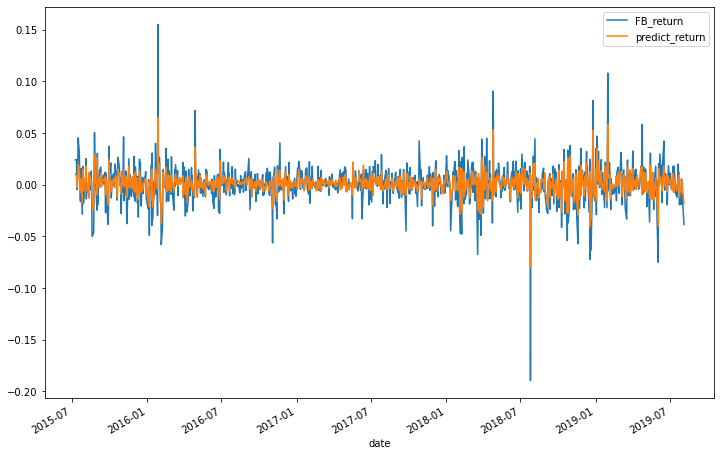

In [340]:
plt.figure(figsize = (12,8))
train['FB_return'].plot(legend = True)
train['predict_return'] = y_hat_train
train['predict_return'].plot(legend = True)

<AxesSubplot:xlabel='date'>

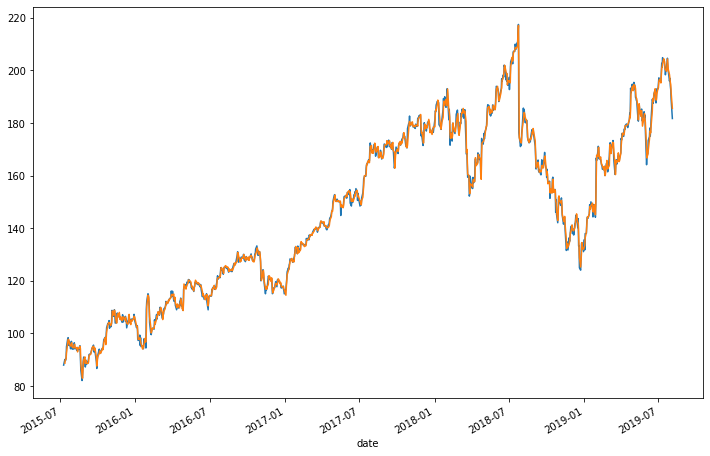

In [341]:
train['predicted_FB'] = train['FB'].shift(1) * (1 + train['predict_return']) 
plt.figure(figsize = (12,8))
train['FB'].plot()
train['predicted_FB'].plot()

In [362]:
print(mean_absolute_error(train['FB'].iloc[1:], train['predicted_FB'].dropna()),'MAE')
print(mean_squared_error(train['FB'].iloc[1:], train['predicted_FB'].dropna()),'RMSE')
print(np.sqrt(mean_squared_log_error(abs(train['FB'].iloc[1:]), abs(train['predicted_FB'].dropna()))),'MLSE')
#print(mda(train['FB'].iloc[1:].values, train['predicted_FB'].dropna().values),'MDA')
print(MDA(train,'predicted_FB'),'MDA')

1.0496212709090258 MAE
2.6320178075157643 RMSE
0.010648579859550355 MLSE
0.7951219512195122 MDA


In [343]:
y_hat_test = y_sc.inverse_transform(reg.predict(test_X_sc)) 
test['predict_return'] = y_hat_test 
#print(mean_absolute_error(train_y, y_hat_train))
#print(mean_squared_log_error(abs(train_y), abs(y_hat_train)))

In [344]:
stock_true = test['FB'].shift(1)
stock_true.iloc[0] = train['FB'].iloc[-1]

In [345]:
def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [363]:
test['predicted_FB'] = stock_true * (1 + test['predict_return']) 
print(mean_absolute_error(test['FB'], test['predicted_FB']), 'MAE')
print(mean_squared_error(test['FB'], test['predicted_FB']),'RMSE')
print(np.sqrt(mean_squared_log_error(abs(test['FB']), abs(test['predicted_FB']))),'MSLE')
#print(mda(test['FB'].values, test['predicted_FB'].values),'MDA')
print(MDA(test,'predicted_FB'),'MDA')

3.6485263675024533 MAE
28.648944874159977 RMSE
0.027836113507402765 MSLE
0.5019607843137255 MDA


<AxesSubplot:xlabel='date'>

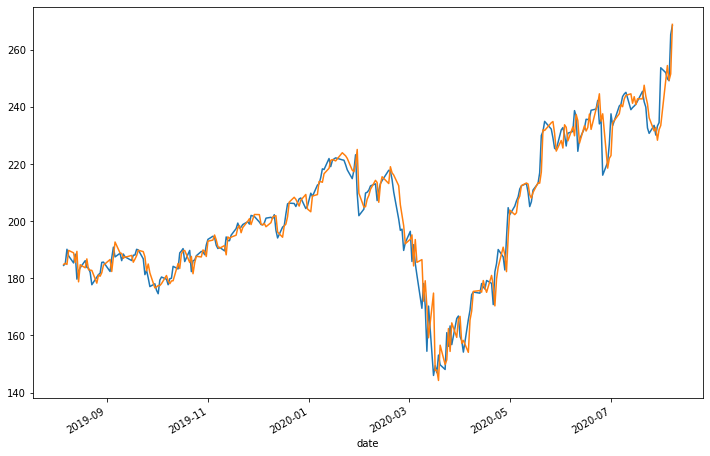

In [347]:
plt.figure(figsize = (12,8))
test['FB'].plot()
test['predicted_FB'].plot()

In [348]:
#Model vlidation 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
reg_valid = LinearRegression()
reg_2 = SVR()

In [349]:
reg_2.fit(train_X_sc,train_y_sc)

SVR()

In [350]:
y_hat_train = y_sc.inverse_transform(reg_2.predict(train_X_sc)) 
train['predict_return_linear'] = y_hat_train

<AxesSubplot:xlabel='date'>

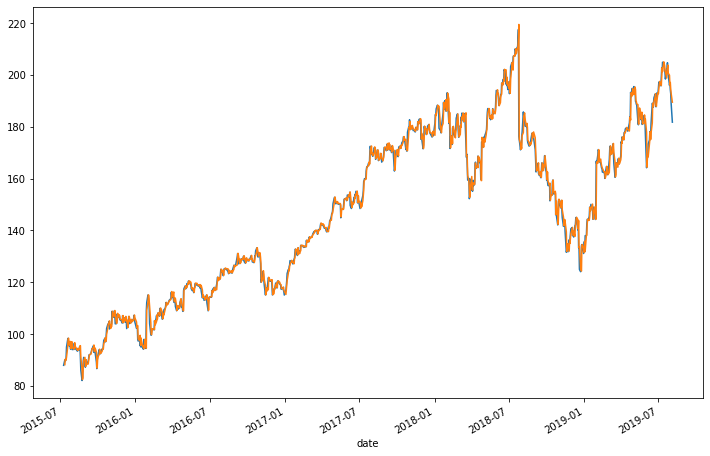

In [351]:
train['predicted_FB_linear'] = train['FB'].shift(1) * (1 + train['predict_return_linear']) 
plt.figure(figsize = (12,8))
train['FB'].plot()
train['predicted_FB_linear'].plot()

In [364]:
print(mean_absolute_error(train['FB'].iloc[1:], train['predicted_FB_linear'].dropna()),'MAE')
print(mean_squared_error(train['FB'].iloc[1:], train['predicted_FB_linear'].dropna()),'RMSE')
print(np.sqrt(mean_squared_log_error(abs(train['FB'].iloc[1:]), abs(train['predicted_FB_linear'].dropna()))),'MLSE')
#print(mda(train['FB'].iloc[1:].values, train['predicted_FB_linear'].dropna().values),'MDA')
print(MDA(train,'predicted_FB_linear'),'MDA')

1.7268455188560268 MAE
8.029525389903839 RMSE
0.018428910021944318 MLSE
0.551219512195122 MDA


In [365]:
y_hat_test = y_sc.inverse_transform(reg_2.predict(test_X_sc)) 
test['predict_return_linear'] = y_hat_test 

test['predicted_FB_linear'] = stock_true * (1 + test['predict_return_linear']) 
print(mean_absolute_error(test['FB'], test['predicted_FB_linear']), 'MAE')
print(mean_squared_error(test['FB'], test['predicted_FB_linear']),'RMSE')
print(np.sqrt(mean_squared_log_error(abs(test['FB']), abs(test['predicted_FB_linear']))),'MSLE')
#print(mda(test['FB'].values, test['predicted_FB_linear'].values),'MDA')
print(MDA(test,'predicted_FB_linear'),'MDA')

3.417912361735973 MAE
24.735862081399837 RMSE
0.025982346567024667 MSLE
0.5529411764705883 MDA


In [354]:
non_zero_importance_name = train_X.columns[reg.feature_importances_ != 0]
non_zero_importance_value = reg.feature_importances_[reg.feature_importances_ != 0]
print(len(non_zero_importance_name))
print(len(non_zero_importance_value))

37
37


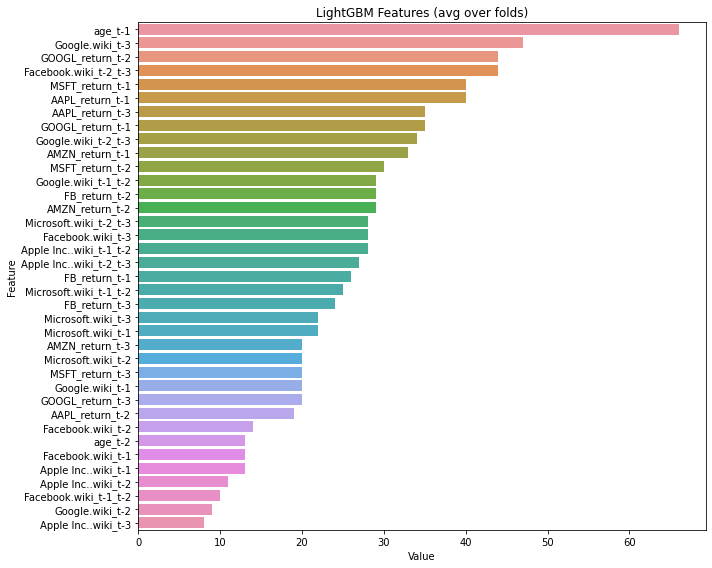

In [367]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(non_zero_importance_value , non_zero_importance_name)), columns=['Value','Feature'])

plt.figure(figsize=(10, 8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [26]:
import nltk
import warnings
warnings.filterwarnings('ignore')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ball4308/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [50]:
import csv
import pandas as pd

# # stock market lexicon
stock_lex = pd.read_csv("/Users/ball4308/Desktop/MSc BA/BA Report /Jason's Project _ Basic Demo /StockSentimentTrading-master/lexicon_data/stock_lex.csv")
stock_lex['sentiment'] = (stock_lex['Aff_Score'] + stock_lex['Neg_Score'])/2
stock_lex = dict(zip(stock_lex.Item, stock_lex.sentiment))
stock_lex = {k:v for k,v in stock_lex.items() if len(k.split(' '))==1}
stock_lex_scaled = {}
for k, v in stock_lex.items():
     if v > 0:
         stock_lex_scaled[k] = v / max(stock_lex.values()) * 4
     else:
         stock_lex_scaled[k] = v / min(stock_lex.values()) * -4

In [51]:
# # # Loughran and McDonald
positive = []
with open("/Users/ball4308/Desktop/MSc BA/BA Report /Jason's Project _ Basic Demo /StockSentimentTrading-master/lexicon_data/lm_positive.csv", 'r') as f:
     reader = csv.reader(f)
     for row in reader:
         positive.append(row[0].strip())
    
negative = []
with open("/Users/ball4308/Desktop/MSc BA/BA Report /Jason's Project _ Basic Demo /StockSentimentTrading-master/lexicon_data/lm_negative.csv", 'r') as f:
     reader = csv.reader(f)
     for row in reader:
         entry = row[0].strip().split(" ")
         if len(entry) > 1:
             negative.extend(entry)
         else:
             negative.append(entry[0])

final_lex = {}
final_lex.update({word:2.0 for word in positive})
final_lex.update({word:-2.0 for word in negative})
final_lex.update(stock_lex_scaled)
final_lex.update(sia.lexicon)
sia.lexicon = final_lex

In [52]:
LM = [x.lower() for x in sia.lexicon.keys()]
print(len(LM))

15453


In [53]:
text_f_text = [x[:-4] for x in text_f]
print(len(text_f_text))
not_important_text  = [x for x in text_f_text if x not in LM]
print(len(not_important_text)) 

19918
10574


In [54]:
delete1 = [x+'_t-1' for x in not_important_text]
delete2 = [x+'_t-2' for x in not_important_text]
data_lm = data.drop(columns = delete1).drop(columns = delete2)
data_lm.shape

(1280, 9398)

In [55]:
data_lm.head()

,Facebook.wiki,Google.wiki,Microsoft.wiki,Apple Inc..wiki,AAPL,AMZN,FB,GOOGL,MSFT,FB_return,...,warn_t-2,bury_t-2,fair_t-2,unqualified_t-2,suspension_t-2,angrily_t-2,redress_t-2,properly_t-2,wait_t-2,disclosure_t-2
date,,,,,,,,,,,,,,,,,,,,,
2015-07-10,46622,42652,7816,12394,113.411430,443.510010,87.949997,556.109985,40.275764,0.024103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-13,47063,44437,7857,12479,115.600922,455.570007,90.099998,571.729980,41.115414,0.024446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-14,44508,45269,7314,11447,115.554909,465.570007,89.680000,584.179993,41.187630,-0.004661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-15,44555,44688,7583,10436,116.668060,461.190002,89.760002,583.960022,41.314034,0.000892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-16,45184,44310,7442,10174,118.222786,475.480011,90.849998,601.780029,42.126591,0.012143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
data_lm = data_lm[list(data_lm.columns[54:]) + ['FB_return'] + ['FB']]
data_lm.head()

,age_t-1,easing_t-1,tout_t-1,organic_t-1,harry_t-1,reliable_t-1,spectrum_t-1,constant_t-1,sleep_t-1,landing_t-1,...,fair_t-2,unqualified_t-2,suspension_t-2,angrily_t-2,redress_t-2,properly_t-2,wait_t-2,disclosure_t-2,FB_return,FB
date,,,,,,,,,,,,,,,,,,,,,
2015-07-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024103,87.949997
2015-07-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024446,90.099998
2015-07-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004661,89.680000
2015-07-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000892,89.760002
2015-07-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012143,90.849998


In [66]:
train_test_split = 0.8
total_days = len(data_lm.index)
split_week = data_lm.index[round(total_days*(train_test_split))]
train = data_lm[data_lm.index <= split_week]
test = data_lm[data_lm.index > split_week]
print(split_week)
print(train.shape)
print(test.shape)

2019-08-05 00:00:00
(1025, 9346)
(255, 9346)


In [82]:
data_lm.columns[54:-2]

Index(['tire_t-1', 'kiss_t-1', 'consumer_t-1', 'unresolved_t-1',
       'anticipation_t-1', 'better_t-1', 'ass_t-1', 'still_t-1',
       'actively_t-1', 'fry_t-1',
       ...
       'warn_t-2', 'bury_t-2', 'fair_t-2', 'unqualified_t-2', 'suspension_t-2',
       'angrily_t-2', 'redress_t-2', 'properly_t-2', 'wait_t-2',
       'disclosure_t-2'],
      dtype='object', length=9290)

In [83]:
train_X, train_y = train[list(data_lm.columns[54:-2])], train['FB_return']
test_X, test_y = test[list(data_lm.columns[54:-2])], test['FB_return']
train_X_sc, train_y_sc = x_sc.fit_transform(train_X), y_sc.fit_transform(train_y.values.reshape(-1, 1))
test_X_sc, test_y_sc = x_sc.transform(test_X), y_sc.transform(test_y.values.reshape(-1, 1))

In [84]:
print(train_X_sc.shape, train_y_sc.shape)
print(test_X_sc.shape, test_y_sc.shape)

(1025, 9290) (1025, 1)
(255, 9290) (255, 1)


In [85]:
reg_4 = SVR(kernel = 'linear')
reg_5 = lgb.LGBMRegressor(max_depth = 10)

In [86]:
def MDA(data, predicted_name): 
    correct = 0
    df = data[['FB',predicted_name]].reset_index()
    for i, r in df.iterrows(): 
        if  i  > 0: 
            if r[predicted_name] > df.at[i-1, 'FB']: 
                if r['FB'] > df.at[i-1, 'FB']: 
                    df.at[i,'correct'] = 1
                    correct += 1 
            if r[predicted_name] < df.at[i-1, 'FB']: 
                if r['FB'] < df.at[i-1, 'FB']: 
                    df.at[i,'correct'] = 1
                    correct += 1 
    return (correct/df.shape[0])

In [87]:
def train_test(reg, data_lm, train_X_sc, train_y_sc, test_X_sc, test_y_sc , LGBM = True, SVR = True): 

    reg.fit(train_X_sc,train_y_sc)

    y_hat_train = y_sc.inverse_transform(reg.predict(train_X_sc))
    print('Train')
    train['predict_return_linear'] = y_hat_train
    stock_yesterday = [i for i in list(data['FB'].loc["2015-07-10":"2019-08-02"])]
    print(len(stock_yesterday))
    return_pred = [i for  i in list(train['predict_return_linear'].loc["2015-07-13":'2019-08-05'])]
    print(len(return_pred))
    pred_stock = [i1 * (1+i2) for (i1,i2) in zip(stock_yesterday,return_pred)]
    print(len(pred_stock)) 
    train['predicted_FB_linear'] = [pred_stock[0]] * len(train.index)
    train['predicted_FB_linear'].loc['2015-07-13':'2019-08-05'] = pred_stock

    print(mean_absolute_error(train['FB'].iloc[1:], train['predicted_FB_linear'].loc['2015-07-13':'2019-08-05']),'MAE')
    print(mean_squared_error(train['FB'].iloc[1:], train['predicted_FB_linear'].loc['2015-07-13':'2019-08-05']),'RMSE')
    print(np.sqrt(mean_squared_log_error(abs(train['FB'].iloc[1:]), abs(train['predicted_FB_linear'].loc['2015-07-13':'2019-08-05']))),'MLSE')
    #print(mda(train['FB'].iloc[1:].values, train['predicted_FB_linear'].dropna().values),'MDA')
    print(MDA(train, 'predicted_FB_linear'),'MDA') 

    y_hat_test = y_sc.inverse_transform(reg.predict(test_X_sc)) 
    test['predict_return_linear'] = y_hat_test 

    stock_yesterday = [i for i in list(data['FB'].loc['2019-08-05':'2020-08-06'])]
    return_pred = [i for  i in list(test['predict_return_linear'])]

    pred_stock = [i1 * (1+i2) for (i1,i2) in zip(stock_yesterday,return_pred)]
    
    print('Test')
    test['predicted_FB_linear'] = pred_stock
    #test['predicted_FB_linear'] = stock_true * (1 + test['predict_return_linear']) 
    print(mean_absolute_error(test['FB'], test['predicted_FB_linear']), 'MAE')
    print(mean_squared_error(test['FB'], test['predicted_FB_linear']),'RMSE')
    print(np.sqrt(mean_squared_log_error(abs(test['FB']), abs(test['predicted_FB_linear']))),'MSLE')
    #print(mda(test['FB'].values, test['predicted_FB_linear'].values),'MDA')
    print(MDA(test,'predicted_FB_linear'),'MDA')

    plt.figure(figsize = (12,8))
    test['FB'].plot(legend = True)
    test['predicted_FB_linear'].plot(legend = True)
    plt.grid()
    
    if LGBM == True: 
        non_zero_importance_name = train_X.columns[reg.feature_importances_ != 0]
        non_zero_importance_value = reg.feature_importances_[reg.feature_importances_ != 0]
        print(len(non_zero_importance_name))
        print(len(non_zero_importance_value))

        if len(non_zero_importance_name) != 0: 

            # sorted(zip(clf.feature_importances_, X.columns), reverse=True)
            feature_imp = pd.DataFrame(sorted(zip(non_zero_importance_value , non_zero_importance_name)), columns=['Value','Feature'])
            plt.figure(figsize=(12, 10))
            sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
            plt.title('LightGBM Features (avg over folds)')
            plt.tight_layout()
            plt.show()

    if SVR == True: 
        important = []
        list_of_coed = list(reg.coef_[0])
        for i in range(len(list_of_coed)): 
            if list_of_coed[i] - list_of_coed[i-1]!= 0 and abs(list_of_coed[i]) >= 1e-05: 
                important.append(list_of_coed[i])
        print(len(important))

        def f_importances(coef, names):
            imp = coef
            imp,names = zip(*sorted(zip(imp,names)))
            plt.figure(figsize=(12,8))
            plt.barh(range(len(names)), imp, align='center', color =(0.2, 0.4, 0.6, 0.6))
            plt.yticks(range(len(names)), names)
            plt.show()

        features_names = train_X.columns[0:len(important)]
        f_importances(important, features_names)

Train
1024
1024
1024
1.7648009901546855 MAE
7.991146667401203 RMSE
0.018491517176493145 MLSE
0.535609756097561 MDA
Test
3.419876975652076 MAE
24.9543222219745 RMSE
0.026111696998425426 MSLE
0.5294117647058824 MDA
1


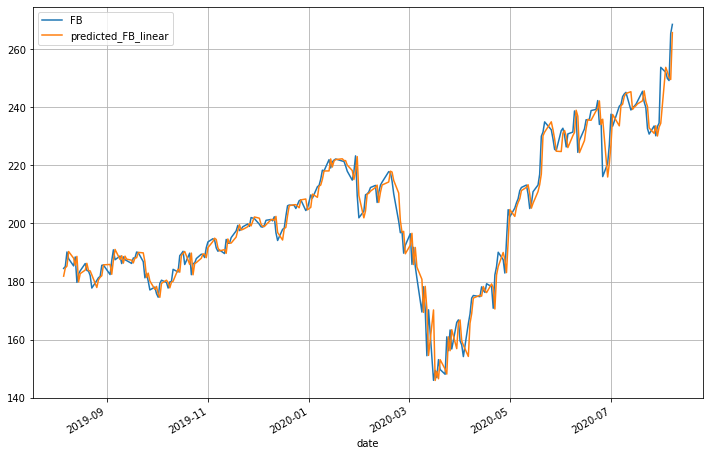

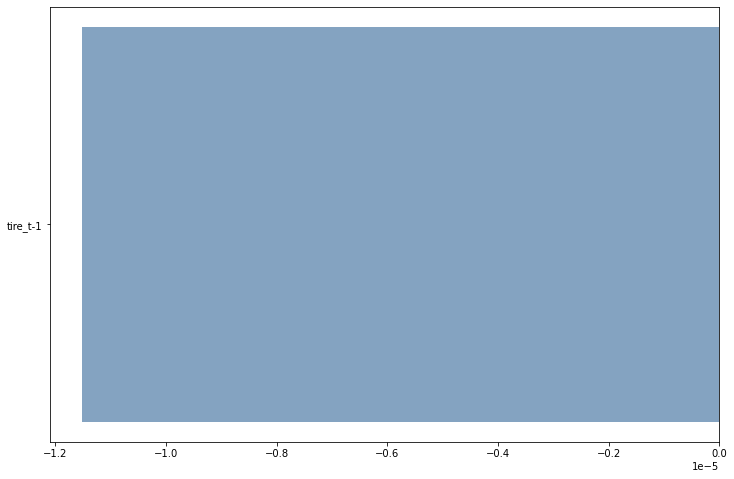

In [88]:
train_test(reg_4, data_lm, train_X_sc, train_y_sc, test_X_sc, test_y_sc, LGBM = False, SVR =  True)

Train
1024
1024
1024
1.7513748418124486 MAE
7.470644912740079 RMSE
0.018040870216510144 MLSE
0.5463414634146342 MDA
Test
3.5193610016773342 MAE
25.768438325446912 RMSE
0.0265143585308589 MSLE
0.5215686274509804 MDA
2
2


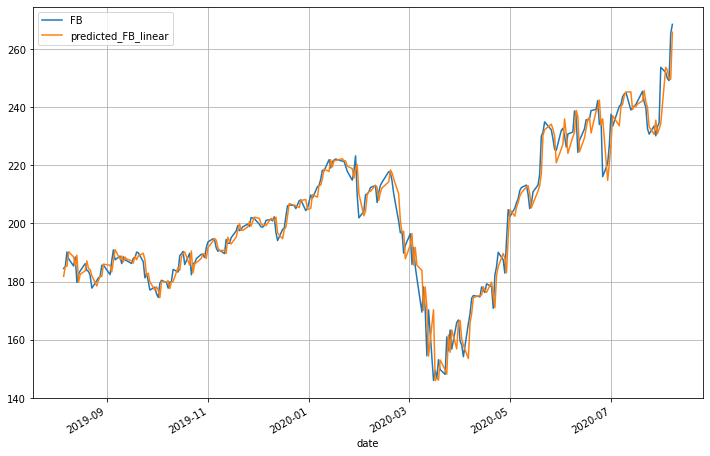

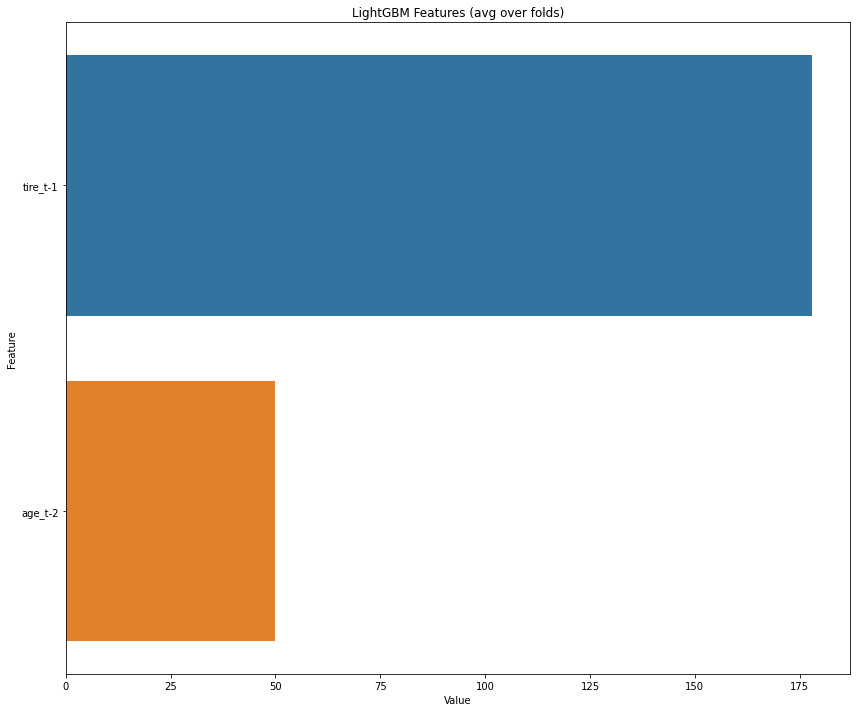

In [89]:
reg_5 = lgb.LGBMRegressor(max_depth = 2)
train_test(reg_5, data_lm, train_X_sc, train_y_sc, test_X_sc, test_y_sc, LGBM = True, SVR =  False)